In [7]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [8]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Set the ticker "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY" . These are the top 10 fintech stock found in Referenc: Motley fool , 
# 
ticker =["SQ","ATV","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_portfolio_year = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_portfolio_year.head()

ATV                                      AXP  \
                              open     high    low    close  volume    open   
2019-12-31 00:00:00-05:00  18.3300  18.3900  17.91  18.3350  1550.0  124.29   
2020-01-02 00:00:00-05:00  18.4616  18.5437  18.35  18.5437  1610.0  124.66   
2020-01-03 00:00:00-05:00  18.5200  18.5200  18.42  18.4200  1729.0  124.32   
2020-01-06 00:00:00-05:00  18.5300  18.5300  18.35  18.4214   559.0  123.37   
2020-01-07 00:00:00-05:00  18.5000  18.5000  18.02  18.4500  3214.0  123.47   

                                                                 ...     SQ  \
                              high       low   close     volume  ...   open   
2019-12-31 00:00:00-05:00  124.574  123.7800  124.46  1706981.0  ...  61.15   
2020-01-02 00:00:00-05:00  126.270  124.2300  125.89  2252326.0  ...  62.99   
2020-01-03 00:00:00-05:00  125.100  123.9400  124.56  1542832.0  ...  62.59   
2020-01-06 00:00:00-05:00  124.160  123.1204  124.09  1711741.0  ...  61.36   
2020-01-07 00:00:00-05:00  124.400  123.3600  123.41  1478312.0  ...  64.57   

                                                              V          \
                            high    low  close   volume    open    high   
2019-12-31 00:00:00-05:00  62.70  61.00  62.56  5005015  187.06  188.00   
2020-01-02 00:00:00-05:00  64.05  62.95  63.83  4571798  189.00  191.14   
2020-01-03 00:00:00-05:00  63.27  62.33  63.00  4870465  188.15  190.96   
2020-01-06 00:00:00-05:00  62.58  61.13  62.57  5681852  188.00  189.21   
2020-01-07 00:00:00-05:00  65.49  63.66  64.57  9016472  189.59  190.10   

                                                     
                               low   close   volume  
2019-12-31 00:00:00-05:00  186.540  187.90  3506421  
2020-01-02 00:00:00-05:00  188.720  191.14  5240901  
2020-01-03 00:00:00-05:00  187.920  189.61  3752535  
2020-01-06 00:00:00-05:00  187.163  189.16  4880802  
2020-01-07 00:00:00-05:00  188.600  188.69  3727880  

[5 rows x 50 columns]

In [34]:
#Second Investment Portfolio datafram
existing_investment_df = pd.read_csv("Investment_Tracker.csv")
existing_investment_df.head()

,Company,Category,Shares,Price,Change,Change (%),Portfolio %,Value
0,AAPL,US Stocks,"1,200",$143.16,$0.24,0.17%,7%,"$171,792.00"
1,NKE,Bonds,"1,300",$135.09,($2.45),-1.78%,8%,"$175,617.00"
2,GLW,International Stocks,"1,200",$37.18,($1.27),-3.30%,2%,"$44,616.00"
3,NEE,Cash,"10,000",$85.25,($1.75),-2.01%,37%,"$852,500.00"
4,IBM,Real Estate,125,$122.48,$3.86,3.25%,1%,"$15,310.00"


In [11]:
# Create and empty DataFrame for closing prices for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_closing_prices["SQ"] = df_portfolio_year["SQ"]["close"]
df_closing_prices["ATV"] = df_portfolio_year["ATV"]["close"]
df_closing_prices["MELI"] = df_portfolio_year["MELI"]["close"]
df_closing_prices["MELI"] = df_portfolio_year["MELI"]["close"]
df_closing_prices["GDOT"] = df_portfolio_year["GDOT"]["close"]
df_closing_prices["PYPL"] = df_portfolio_year["PYPL"]["close"]
df_closing_prices["FISV"] = df_portfolio_year["PFE"]["close"]
df_closing_prices["GS"] = df_portfolio_year["GS"]["close"]
df_closing_prices["V"] = df_portfolio_year["V"]["close"]
df_closing_prices["AXP"] = df_portfolio_year["AXP"]["close"]
#df_closing_prices["SPY"] = df_sp500["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SQ,ATV,MELI,GDOT,PYPL,FISV,GS,V,AXP
2019-12-31,62.56,18.3350,571.93,23.29,108.21,39.16,229.880,187.90,124.46
2020-01-02,63.83,18.5437,610.50,23.35,110.75,39.14,234.360,191.14,125.89
2020-01-03,63.00,18.4200,608.02,22.97,108.77,38.92,231.510,189.61,124.56
2020-01-06,62.57,18.4214,606.69,23.32,110.16,38.87,233.950,189.16,124.09
2020-01-07,64.57,18.4500,625.00,23.41,109.68,38.76,235.515,188.69,123.41


In [12]:
# Compute daily returns after cleaning the null values if any
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,SQ,ATV,MELI,GDOT,PYPL,FISV,GS,V,AXP
2020-01-02,0.020301,0.011383,0.067438,0.002576,0.023473,-0.000511,0.019488,0.017243,0.011490
2020-01-03,-0.013003,-0.006671,-0.004062,-0.016274,-0.017878,-0.005621,-0.012161,-0.008005,-0.010565
2020-01-06,-0.006825,0.000076,-0.002187,0.015237,0.012779,-0.001285,0.010540,-0.002373,-0.003773
2020-01-07,0.031964,0.001553,0.030180,0.003859,-0.004357,-0.002830,0.006689,-0.002485,-0.005480
2020-01-08,0.046926,-0.004878,0.013408,0.016660,0.019602,0.007482,0.009617,0.017118,0.017341


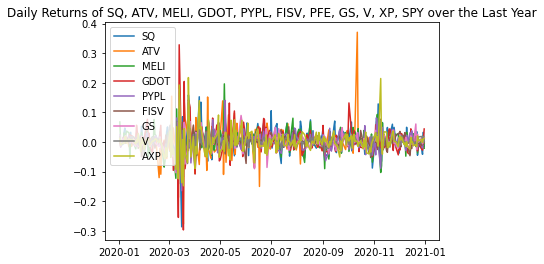

In [13]:
# Plot daily returns for "SQ","ADYEY","MELI","GDOT","PYPL","FISV","PFE","GS","V","AXP","SPY"
df_daily_returns.plot(title="Daily Returns of SQ, ATV, MELI, GDOT, PYPL, FISV, PFE, GS, V, XP, SPY over the Last Year")

In [14]:
# Running simulations on top 10 fintech stocks along with SPY
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_all = MCSimulation(
    portfolio_data = df_portfolio_year,
    weights = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10],
    num_simulation = num_sims,
    num_trading_days = 252
)
MC_simulation_all.portfolio_data.head()

ATV                                   \
                              open     high    low    close  volume   
2019-12-31 00:00:00-05:00  18.3300  18.3900  17.91  18.3350  1550.0   
2020-01-02 00:00:00-05:00  18.4616  18.5437  18.35  18.5437  1610.0   
2020-01-03 00:00:00-05:00  18.5200  18.5200  18.42  18.4200  1729.0   
2020-01-06 00:00:00-05:00  18.5300  18.5300  18.35  18.4214   559.0   
2020-01-07 00:00:00-05:00  18.5000  18.5000  18.02  18.4500  3214.0   

                                           AXP                             \
                          daily_return    open     high       low   close   
2019-12-31 00:00:00-05:00          NaN  124.29  124.574  123.7800  124.46   
2020-01-02 00:00:00-05:00     0.011383  124.66  126.270  124.2300  125.89   
2020-01-03 00:00:00-05:00    -0.006671  124.32  125.100  123.9400  124.56   
2020-01-06 00:00:00-05:00     0.000076  123.37  124.160  123.1204  124.09   
2020-01-07 00:00:00-05:00     0.001553  123.47  124.400  123.3600  123.41   

                           ...     SQ                                    V  \
                           ...    low  close   volume daily_return    open   
2019-12-31 00:00:00-05:00  ...  61.00  62.56  5005015          NaN  187.06   
2020-01-02 00:00:00-05:00  ...  62.95  63.83  4571798     0.020301  189.00   
2020-01-03 00:00:00-05:00  ...  62.33  63.00  4870465    -0.013003  188.15   
2020-01-06 00:00:00-05:00  ...  61.13  62.57  5681852    -0.006825  188.00   
2020-01-07 00:00:00-05:00  ...  63.66  64.57  9016472     0.031964  189.59   

                                                                          
                             high      low   close   volume daily_return  
2019-12-31 00:00:00-05:00  188.00  186.540  187.90  3506421          NaN  
2020-01-02 00:00:00-05:00  191.14  188.720  191.14  5240901     0.017243  
2020-01-03 00:00:00-05:00  190.96  187.920  189.61  3752535    -0.008005  
2020-01-06 00:00:00-05:00  189.21  187.163  189.16  4880802    -0.002373  
2020-01-07 00:00:00-05:00  190.10  188.600  188.69  3727880    -0.002485  

[5 rows x 60 columns]

In [15]:
# Running simulations on all stocks
MC_simulation_all.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006257,1.004398,0.988004,1.003231,0.999538,0.981482,1.012225,1.003818,1.009783,1.000413,...,0.992884,0.982977,1.009829,1.010736,0.999019,0.997212,0.984034,0.994653,1.006973,1.021735
2,0.993788,1.028689,0.992730,1.015253,1.006474,0.991894,1.036805,1.019963,1.012501,1.002309,...,0.993048,1.002358,1.038105,1.008509,0.999947,0.988461,0.977245,1.004295,1.014545,1.020908
3,1.005901,1.037766,0.988994,1.036040,1.022612,0.989032,1.057634,1.034206,1.015125,0.994816,...,0.999426,1.002095,1.034183,1.001250,1.016167,1.002183,0.986092,1.001832,1.038652,0.990982
4,0.991288,1.027143,0.990055,1.062175,1.047182,0.983139,1.094543,1.031430,1.040841,0.972093,...,1.011416,1.010865,1.036529,1.004043,0.997745,1.024148,0.968173,0.999948,1.025884,1.001163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.453440,1.866626,2.217725,0.999179,2.006606,1.657678,1.707514,2.372135,1.639947,1.287381,...,2.152055,1.916166,1.793767,1.441999,1.865861,1.546189,1.500066,1.750083,1.222414,1.494073
249,1.462838,1.879291,2.253819,1.003156,1.975198,1.633761,1.692724,2.417627,1.635359,1.281466,...,2.181748,1.932892,1.787665,1.464001,1.842261,1.527774,1.475843,1.754751,1.248156,1.503178
250,1.426486,1.899626,2.311153,1.013251,1.968286,1.611247,1.675120,2.428840,1.631556,1.324151,...,2.175351,1.951854,1.793334,1.466144,1.871564,1.508154,1.486252,1.767192,1.269426,1.505053
251,1.433246,1.905775,2.307144,1.020975,1.971408,1.604892,1.664908,2.450661,1.657130,1.299542,...,2.172353,1.960823,1.782136,1.487438,1.906552,1.511779,1.500070,1.737235,1.276360,1.482862


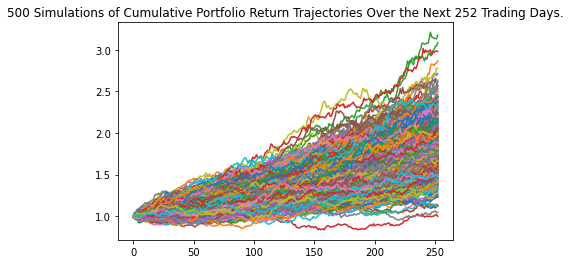

In [16]:
# Create distribution plot of cumulative returns for our portfolio
all_line_plot = MC_simulation_all.plot_simulation()

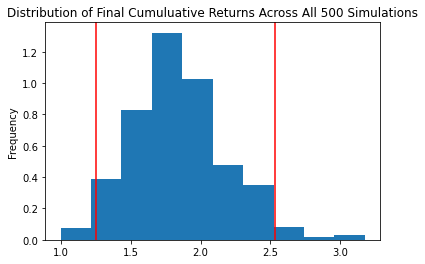

In [17]:
# Create distribution plot of cumulative returns for our portfolio
all_dist_plot = MC_simulation_all.plot_distribution()

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
all_tbl = MC_simulation_all.summarize_cumulative_return()

# Print summary statistics
print(all_tbl)

count           500.000000
mean              1.837691
std               0.332152
min               0.997270
25%               1.612386
50%               1.814921
75%               2.011795
max               3.175513
95% CI Lower      1.251693
95% CI Upper      2.530266
Name: 252, dtype: float64


In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $1,000,000 investments in stocks
all_ci_lower = round(all_tbl[8]*1000000,2)
all_ci_upper = round(all_tbl[9]*1000000,2)
print(all_ci_lower)
print(all_ci_upper)

1251693.23
2530265.85


In [20]:
ticker =["SPY"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for S&P 500
df_sp500 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

df_sp500.head()

SPY                                  
                             open    high     low   close    volume
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.89  38134256
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984

In [21]:
# Running simulations on S&P 500
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_simulation_spy = MCSimulation(
    portfolio_data = df_sp500,
    weights = [1],
    num_simulation = num_sims,
    num_trading_days = 252
)
MC_simulation_spy.portfolio_data.head()

SPY                                    \
                             open    high     low   close    volume   
2019-12-31 00:00:00-05:00  320.53  322.13  320.15  321.89  38134256   
2020-01-02 00:00:00-05:00  323.54  324.85  322.53  324.84  48217559   
2020-01-03 00:00:00-05:00  321.16  323.64  321.10  322.44  58408809   
2020-01-06 00:00:00-05:00  320.49  323.73  320.36  323.67  43105385   
2020-01-07 00:00:00-05:00  323.02  323.54  322.24  322.76  33909984   

                                        
                          daily_return  
2019-12-31 00:00:00-05:00          NaN  
2020-01-02 00:00:00-05:00     0.009165  
2020-01-03 00:00:00-05:00    -0.007388  
2020-01-06 00:00:00-05:00     0.003815  
2020-01-07 00:00:00-05:00    -0.002812

In [22]:
MC_simulation_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010803,0.992186,0.994039,0.987158,1.010321,0.990233,1.004000,1.002711,0.981315,1.013890,...,1.034446,1.010070,1.018807,1.004160,1.003372,1.016605,1.000624,1.025003,0.987156,0.981032
2,0.990706,0.965157,0.983646,0.970552,1.040657,0.967413,1.005111,1.018477,1.007043,1.027494,...,1.058520,0.963623,1.018997,0.976077,0.996438,1.024815,0.993138,1.048874,0.982559,0.947848
3,0.958145,1.003249,0.994320,0.974446,1.058054,0.980718,1.028755,0.972501,0.995051,1.023752,...,1.041637,0.975502,1.061732,0.958153,0.981101,1.034377,1.013177,1.037999,0.939941,0.982595
4,0.957678,1.034181,0.971809,0.993557,1.051138,0.966670,1.031746,0.952540,0.977276,1.027392,...,1.071003,0.973349,1.050078,0.971999,0.981730,1.043950,1.014202,1.030178,0.935866,1.014951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.345977,1.593867,0.703903,0.861088,1.513478,0.843188,1.461896,1.112481,1.523804,0.844969,...,1.388964,1.329129,1.024135,1.075752,0.831886,1.228525,1.475830,1.593473,1.276336,0.942444
249,1.306067,1.627419,0.694593,0.894430,1.551180,0.837230,1.488367,1.129177,1.535979,0.876348,...,1.368009,1.331100,1.021567,1.066785,0.815025,1.215182,1.486144,1.600570,1.266521,0.953091
250,1.300271,1.643115,0.705852,0.891434,1.540167,0.821187,1.494970,1.182733,1.550505,0.872037,...,1.395594,1.315611,1.037611,1.072055,0.803341,1.173249,1.491540,1.588086,1.317661,0.915812
251,1.260651,1.631303,0.712843,0.898849,1.505462,0.783187,1.438707,1.188823,1.519647,0.868300,...,1.388722,1.341457,1.008641,1.042779,0.802662,1.187210,1.433922,1.554119,1.319688,0.927179


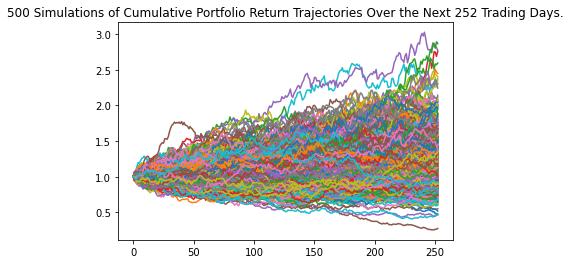

In [23]:
# Create distribution plot of cumulative returns for SPY
spy_line_plot = MC_simulation_spy.plot_simulation()

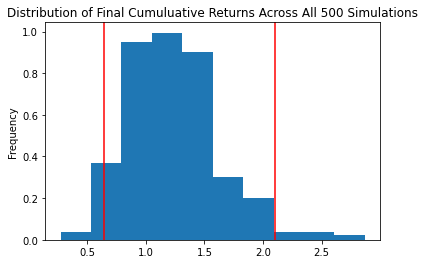

In [24]:
# Create distribution plot of cumulative returns for SPY
spy_dist_plot = MC_simulation_spy.plot_distribution()

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_tbl = MC_simulation_spy.summarize_cumulative_return()

# Print summary statistics for SPY
print(spy_tbl)

count           500.000000
mean              1.237434
std               0.392628
min               0.273684
25%               0.946966
50%               1.207531
75%               1.444650
max               2.868214
95% CI Lower      0.640235
95% CI Upper      2.102709
Name: 252, dtype: float64


In [26]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $1,000,000 investments in SPY
spy_ci_lower = round(spy_tbl[8]*1000000,2)
spy_ci_upper = round(spy_tbl[9]*1000000,2)
print(spy_ci_lower)
print(spy_ci_upper)

640234.89
2102709.34


In [27]:
def investment(PMT, n, i):
    x = 0
    investment_balance = 0
    while x < n:
        investment_balance *= (1 + i)
        investment_balance += PMT
        x = x + 1

    return round(investment_balance, 2)

In [28]:
investment(1000000, 12, .06)

16869941.2

In [ ]:
#Fintech all_ci_upper -- 10 fintech stock performance based on summary statics
# SPY spy_ci_upper --- SPY highest return based on summary statistics

#if FINTECH UPPER > SPY_UPPER then 
 #       compare the highest return amongst the fintech 10 stocks and include top 5
  #      recommendation = include fintech with current portfolio 
        #